In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist

In [2]:
#nltk.download('inaugural')

In [3]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [4]:
speech=[]
roose=inaugural.raw('1941-Roosevelt.txt')
ken=inaugural.raw('1961-Kennedy.txt')
nixon=inaugural.raw('1973-Nixon.txt')
speech.append(roose)
speech.append(ken)
speech.append(nixon)
docs=pd.Series(data=speech,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
speech_df=pd.DataFrame(docs,columns=['Speech'])

In [5]:
speech_df

,Speech
1941-Roosevelt,On each national day of inauguration since 178...
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [6]:
#Number of characters including spaces
char=[]
char.append(len(roose)) #inaugural.raw('1941-Roosevelt.txt')
char.append(len(ken))
char.append(len(nixon))
chara=pd.Series(data=char,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
char_df=pd.DataFrame(chara,columns=['No. of Characers'])
char_df

,No. of Characers
1941-Roosevelt,7571
1961-Kennedy,7618
1973-Nixon,9991


#Number of words
words=[]
roose_w = word_tokenize(roose)
ken_w = word_tokenize(ken)
nixon_w = word_tokenize(nixon)
words.append(len(roose_w))
words.append(len(ken_w))
words.append(len(nixon_w))
wordsa=pd.Series(data=words,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
words_df=pd.DataFrame(wordsa,columns=['No. of words'])

In [7]:
#Number of words
words=[]
roose_w = inaugural.words('1941-Roosevelt.txt')
ken_w = inaugural.words('1961-Kennedy.txt')
nixon_w = inaugural.words('1973-Nixon.txt')
words.append(len(roose_w))
words.append(len(ken_w))
words.append(len(nixon_w))
wordsa=pd.Series(data=words,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
words_df=pd.DataFrame(wordsa,columns=['No. of words'])

In [8]:
words_df

,No. of words
1941-Roosevelt,1536
1961-Kennedy,1546
1973-Nixon,2028


In [9]:
#average word length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

speech_df['avg_word'] = speech_df['Speech'].apply(lambda x: avg_word(x))
speech_df[['Speech','avg_word']].head()

,Speech,avg_word
1941-Roosevelt,On each national day of inauguration since 178...,4.539706
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.461871
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.465091


In [10]:
#Number of Sentences

sent=[]
roose_s = inaugural.sents('1941-Roosevelt.txt')
ken_s = inaugural.sents('1961-Kennedy.txt')
nixon_s = inaugural.sents('1973-Nixon.txt')
sent.append(len(roose_s))
sent.append(len(ken_s))
sent.append(len(nixon_s))
senta=pd.Series(data=sent,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
senta_df=pd.DataFrame(senta,columns=['No. of Sentences'])

In [11]:
senta_df

,No. of Sentences
1941-Roosevelt,68
1961-Kennedy,52
1973-Nixon,69


#Number of Sentences

sent=[]
roose_s = sent_tokenize(roose)
ken_s = sent_tokenize(ken)
nixon_s = sent_tokenize(nixon)
sent.append(len(roose_s))
sent.append(len(ken_s))
sent.append(len(nixon_s))
senta=pd.Series(data=sent,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
senta_df=pd.DataFrame(senta,columns=['No. of Sentences'])

## 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords

In [12]:
speech_df_clean=speech_df.copy()

In [13]:
speech_df_clean.drop(columns='avg_word',inplace=True)

In [14]:
speech_df_clean['Speech'] = speech_df_clean['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech_df_clean['Speech'].head()

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [15]:
for s in speech_df_clean['Speech']:
     s = str(s)

In [16]:
def remove_uni(s):
    uni = re.sub(r'<.*?>', ' ', s)
    return uni

speech_df_clean['Speech'] = speech_df_clean['Speech'].apply(lambda x: remove_uni(x))

In [17]:
def remove_punc(s):
    no_punc = "".join([i for i in s if i not in string.punctuation])
    return no_punc

speech_df_clean['Speech'] = speech_df_clean['Speech'].apply(lambda x: remove_punc(x))

In [18]:
#before removing stopwords
speech_df_clean.Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    1338
1961-Kennedy      1365
1973-Nixon        1802
Name: Speech, dtype: int64

In [19]:
stop = stopwords.words('english')
speech_df_clean['Speech']  = speech_df_clean['Speech'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech_df_clean['Speech'] .head()

1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [20]:
#after removing stopwords
speech_df_clean.Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    627
1961-Kennedy      693
1973-Nixon        833
Name: Speech, dtype: int64

In [36]:
speech_df_clean['Speech'][0][0:200]

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within da'

In [21]:
## stemming
st = PorterStemmer()
speech_df_clean['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

1941-Roosevelt    nation day inaugur sinc 1789 peopl renew sens ...
1961-Kennedy      vice presid johnson mr speaker mr chief justic...
1973-Nixon        mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

In [22]:
speech_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 1941-Roosevelt to 1973-Nixon
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Speech  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [23]:
roose_ww=word_tokenize(speech_df_clean['Speech'][0])
ken_ww=word_tokenize(speech_df_clean['Speech'][1])
nixon_ww=word_tokenize(speech_df_clean['Speech'][2])

In [24]:
fqd_r = FreqDist(roose_ww)
fqd_k= FreqDist(ken_ww)
fqd_n= FreqDist(nixon_ww)

In [25]:
fq=pd.DataFrame(fqd_r.most_common(3),columns=['words','No. of times'])
fq.set_index('words')

,No. of times
words,
nation,11
know,10
spirit,9


In [26]:
fq=pd.DataFrame(fqd_k.most_common(3),columns=['words','No. of times'])
fq.set_index('words')

,No. of times
words,
let,16
us,12
world,8


In [27]:
fq=pd.DataFrame(fqd_n.most_common(3),columns=['words','No. of times'])
fq.set_index('words')

,No. of times
words,
us,26
let,22
peace,19


## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Roosevelt Speech


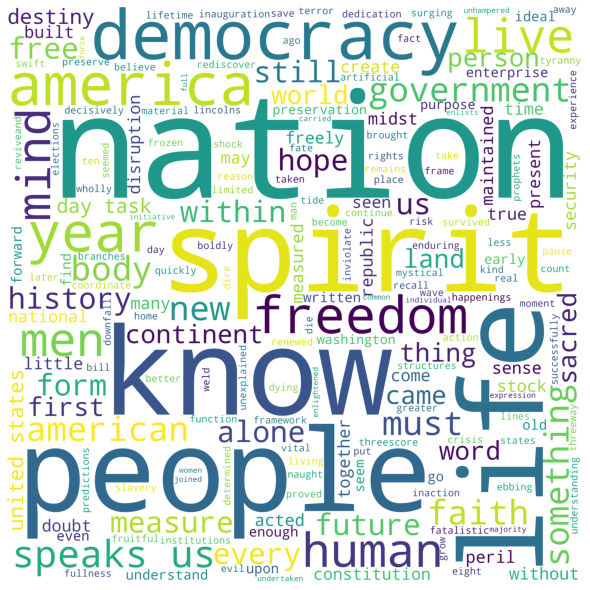

In [28]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(speech_df_clean['Speech'][0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt Speech")
plt.show()


Word Cloud for Kennedy Speech


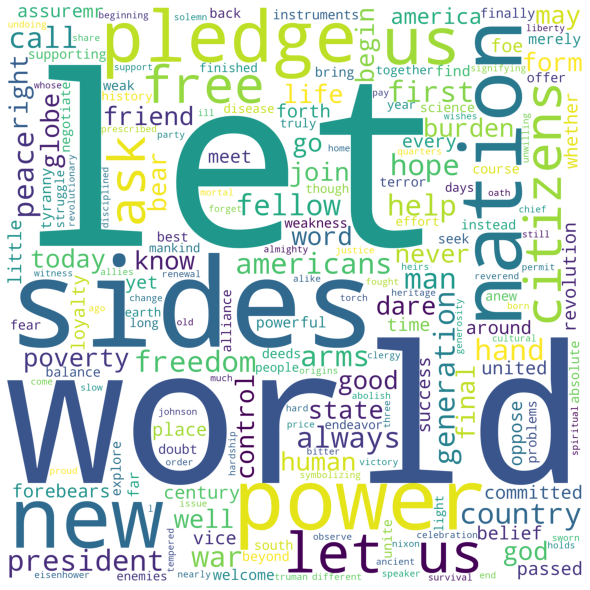

In [29]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(speech_df_clean['Speech'][1]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech")
plt.show()



Word Cloud for Nixon Speech


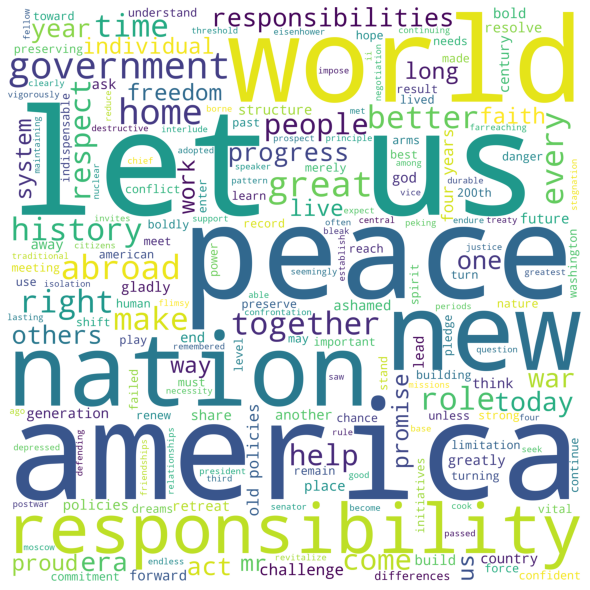

In [30]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(speech_df_clean['Speech'][2]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech")
plt.show()

